# ♦ In Depth analysing of restraurant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\data_set\cleaned data for anaysis\cleaned_zomato.csv")
df.head()

Unnamed: 0                                                url  \
0           0  https://www.zomato.com/bangalore/jalsa-banasha...   
1           1  https://www.zomato.com/bangalore/spice-elephan...   
2           2  https://www.zomato.com/SanchurroBangalore?cont...   
3           3  https://www.zomato.com/bangalore/addhuri-udupi...   
4           4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Q1) Calculate average rating of each restaurant

In [4]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.head()

name  rate
0                          #FeelTheROLL   3.4
1                            #L-81 Cafe   3.9
2                               #refuel   3.7
3                              1000 B.C   3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C   3.7

In [5]:
df_rate.columns = ['restaurant', 'avg_rating']
df_rate.head()

restaurant  avg_rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

In [6]:
from PIL import Image

## Q2) Get the Distribution of Rating column and try to find out what distribution this feature supports ?

In [7]:
! pip install kaleido

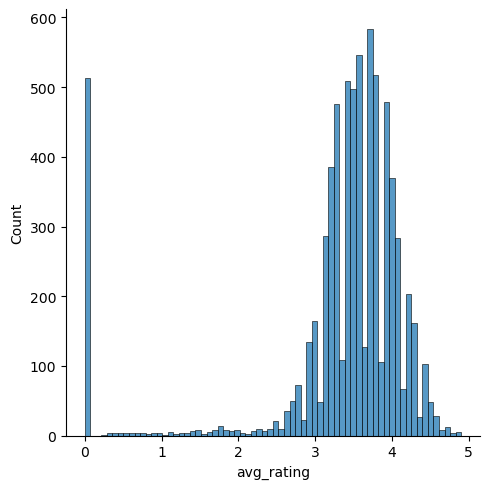

In [8]:
sns.displot(df_rate['avg_rating'])

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\1 Distribution of Rating column.jpeg', format='jpeg',dpi = 300,bbox_inches = 'tight')


# from this you can say that almost 50% of restaurant in have rating 3-4

## Q3) Top restaurant chains in Bengalore

In [9]:
df_rate.shape

(7162, 2)

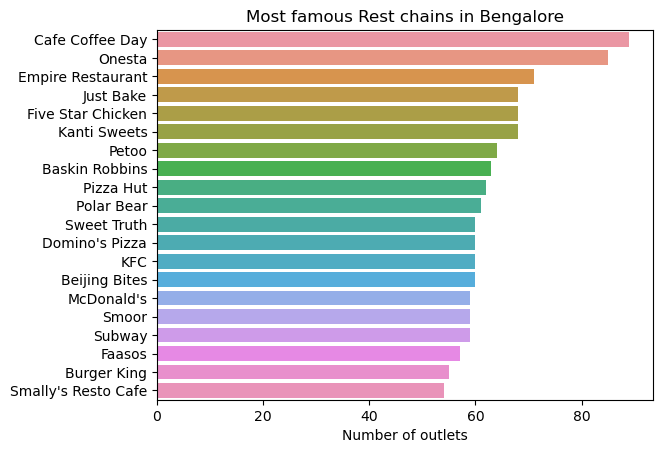

In [10]:
chains = df['name'].value_counts()[0:20]
sns.barplot(x = chains, y = chains.index)
plt.title('Most famous Rest chains in Bengalore')
plt.xlabel('Number of outlets')

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\2 Top restaurant chains in Bengalore.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')


# here we count the number of restaurant of specific frenchies in Bengalore
# These are Top20 restaurant in Bengalore

## Q4 How many of the restaurant accept or do not accept online order.

In [11]:
x = df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [12]:
import plotly.express as px

labels = ['accepted', 'Not accepted']

In [13]:
px.pie(df,values = x, labels = labels, title = 'Pie Chart')

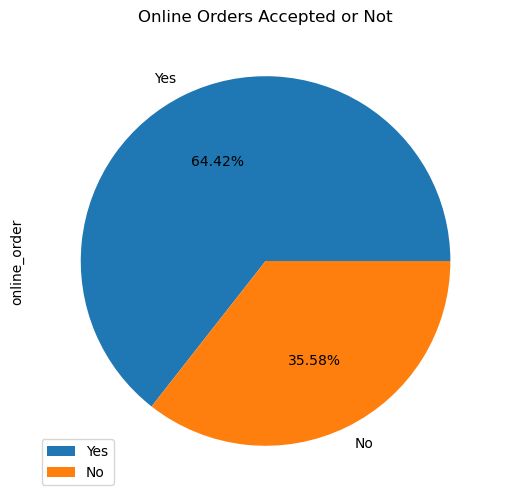

In [14]:
plt.figure(figsize=(6,6))
df['online_order'].value_counts().plot.pie(autopct='%1.2f%%')
plt.legend()
plt.title('Online Orders Accepted or Not')

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\restaurant accept or do not accept online order.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

# ♦ Analysing of famous restaurant

## Q5) Ratio of restaurant that provide booking table nad do not provide booking table ?

In [15]:
df['book_table'].value_counts()

No     37509
Yes     6433
Name: book_table, dtype: int64

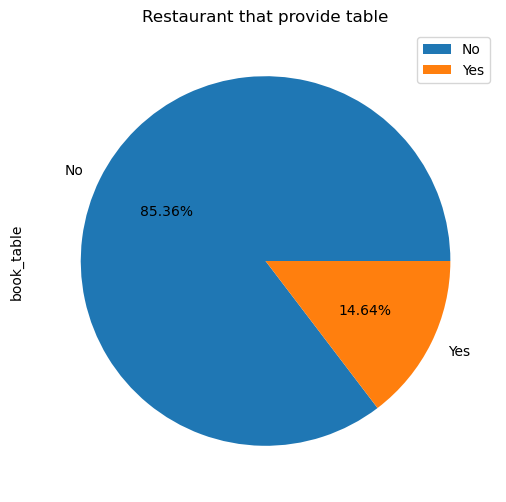

In [16]:
plt.figure(figsize = (6,6))
df['book_table'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.legend()
plt.title('Restaurant that provide table')

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\restaurant that provide booking table.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

In [17]:
x = df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [18]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [19]:
labels = ['not book', 'book']

In [20]:
trace = go.Pie(labels = labels, values = x, hoverinfo = 'label + percent', textinfo = 'value')
iplot([trace])

# Q6) Analysis of Types of restaurant we have

In [21]:
df['rest_type'].isnull().sum()

151

In [22]:
df.dropna(inplace = True, axis = 0, subset = ['rest_type'])

In [23]:
df["rest_type"].isna().sum()

0

In [24]:
len(df['rest_type'].unique())

87

In [25]:
rest_type = df['rest_type'].value_counts().sort_values(ascending = False)[0:20]
rest_type.head(20)

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

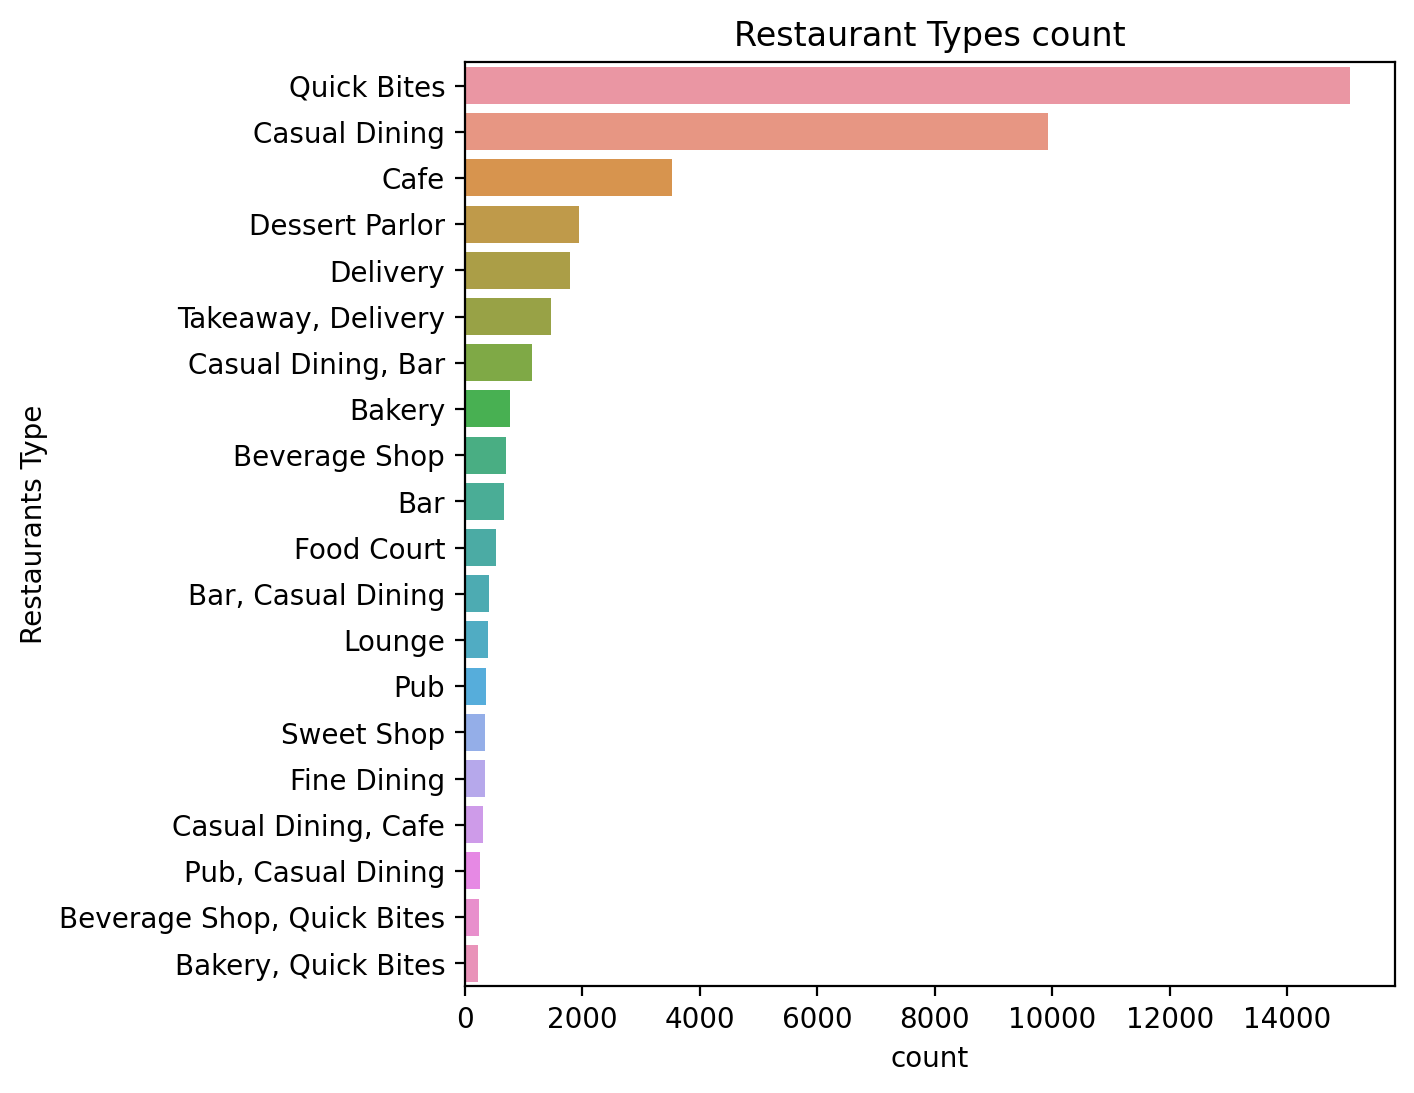

In [26]:
plt.figure(figsize = (6,6), dpi = 200)
sns.barplot(x = rest_type, y = rest_type.index)
plt.xlabel('count')
plt.ylabel('Restaurants Type')
plt.title('Restaurant Types count')
plt.show()

In [27]:
import plotly.express as px

In [28]:
from plotly.offline import iplot
from IPython.display import Image

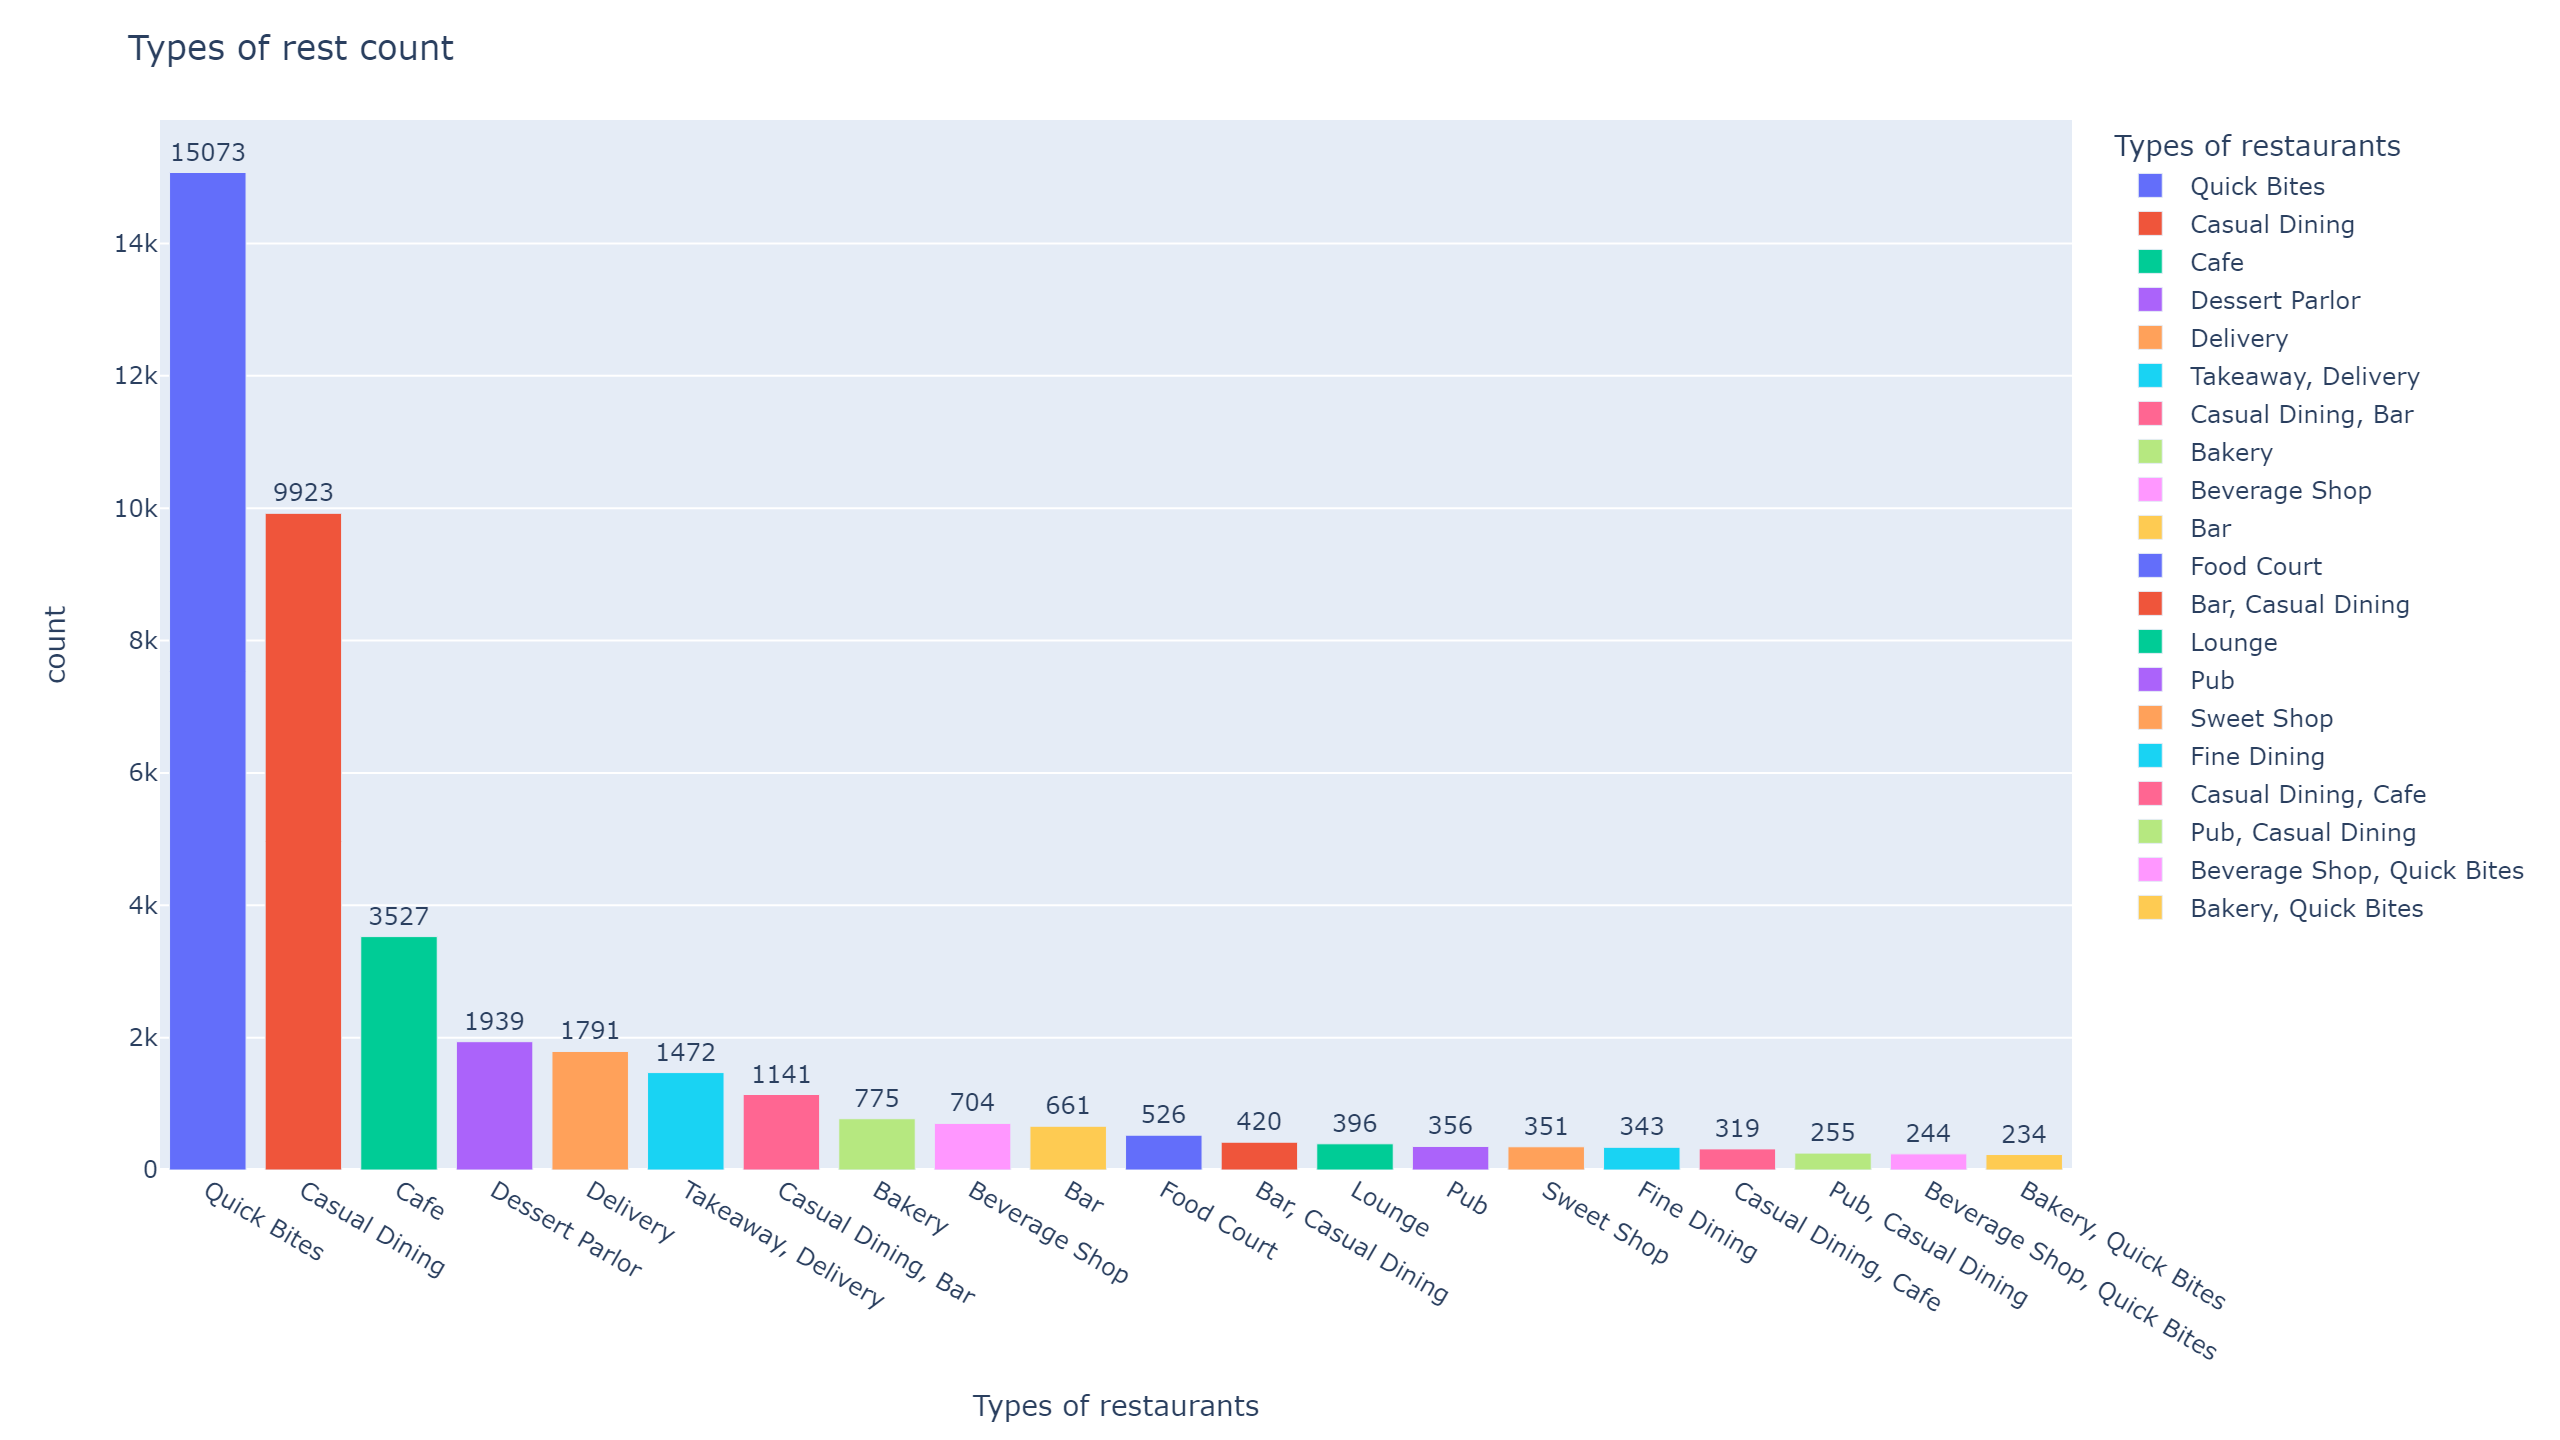

In [29]:
fig = px.bar(df['rest_type'],x = df['rest_type'].value_counts().nlargest(20).index, y = df['rest_type'].value_counts().nlargest(20), color=df['rest_type'].value_counts().nlargest(20).index, text=df['rest_type'].value_counts().nlargest(20))
fig.update_layout(xaxis_title = 'Types of restaurants', yaxis_title = 'count')
fig.update_layout(title='Types of rest count')
fig.update_layout(legend={"title" :'Types of restaurants'})
fig.update_traces(textposition = 'outside')


# save as image
fig.write_image(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\2 Analysing of Restaurant.jpeg",width = 1280, height = 720, engine = 'kaleido')
Image(fig.to_image(format='png',width=1280,height=720,engine='kaleido',scale=2))

# Q7) Find the highest voted restaurant in Bangelore

<AxesSubplot:xlabel='name'>

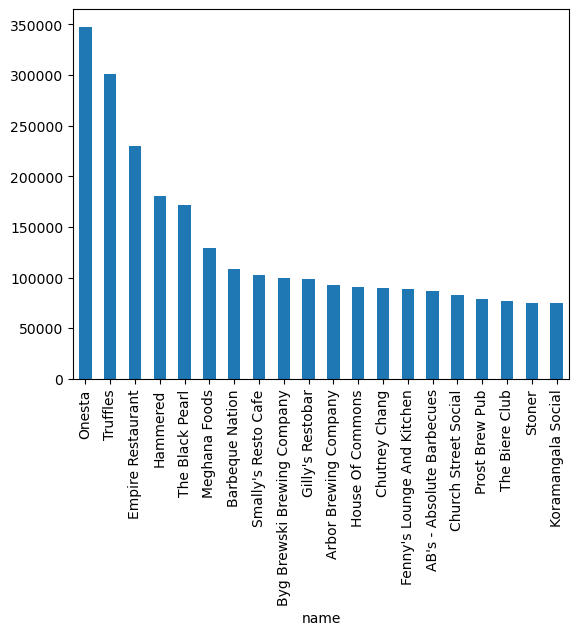

In [30]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()


# These are my highest voted restaurant
# Hence the highest voted restaurant is 'Onesta' which has votes more than 350000

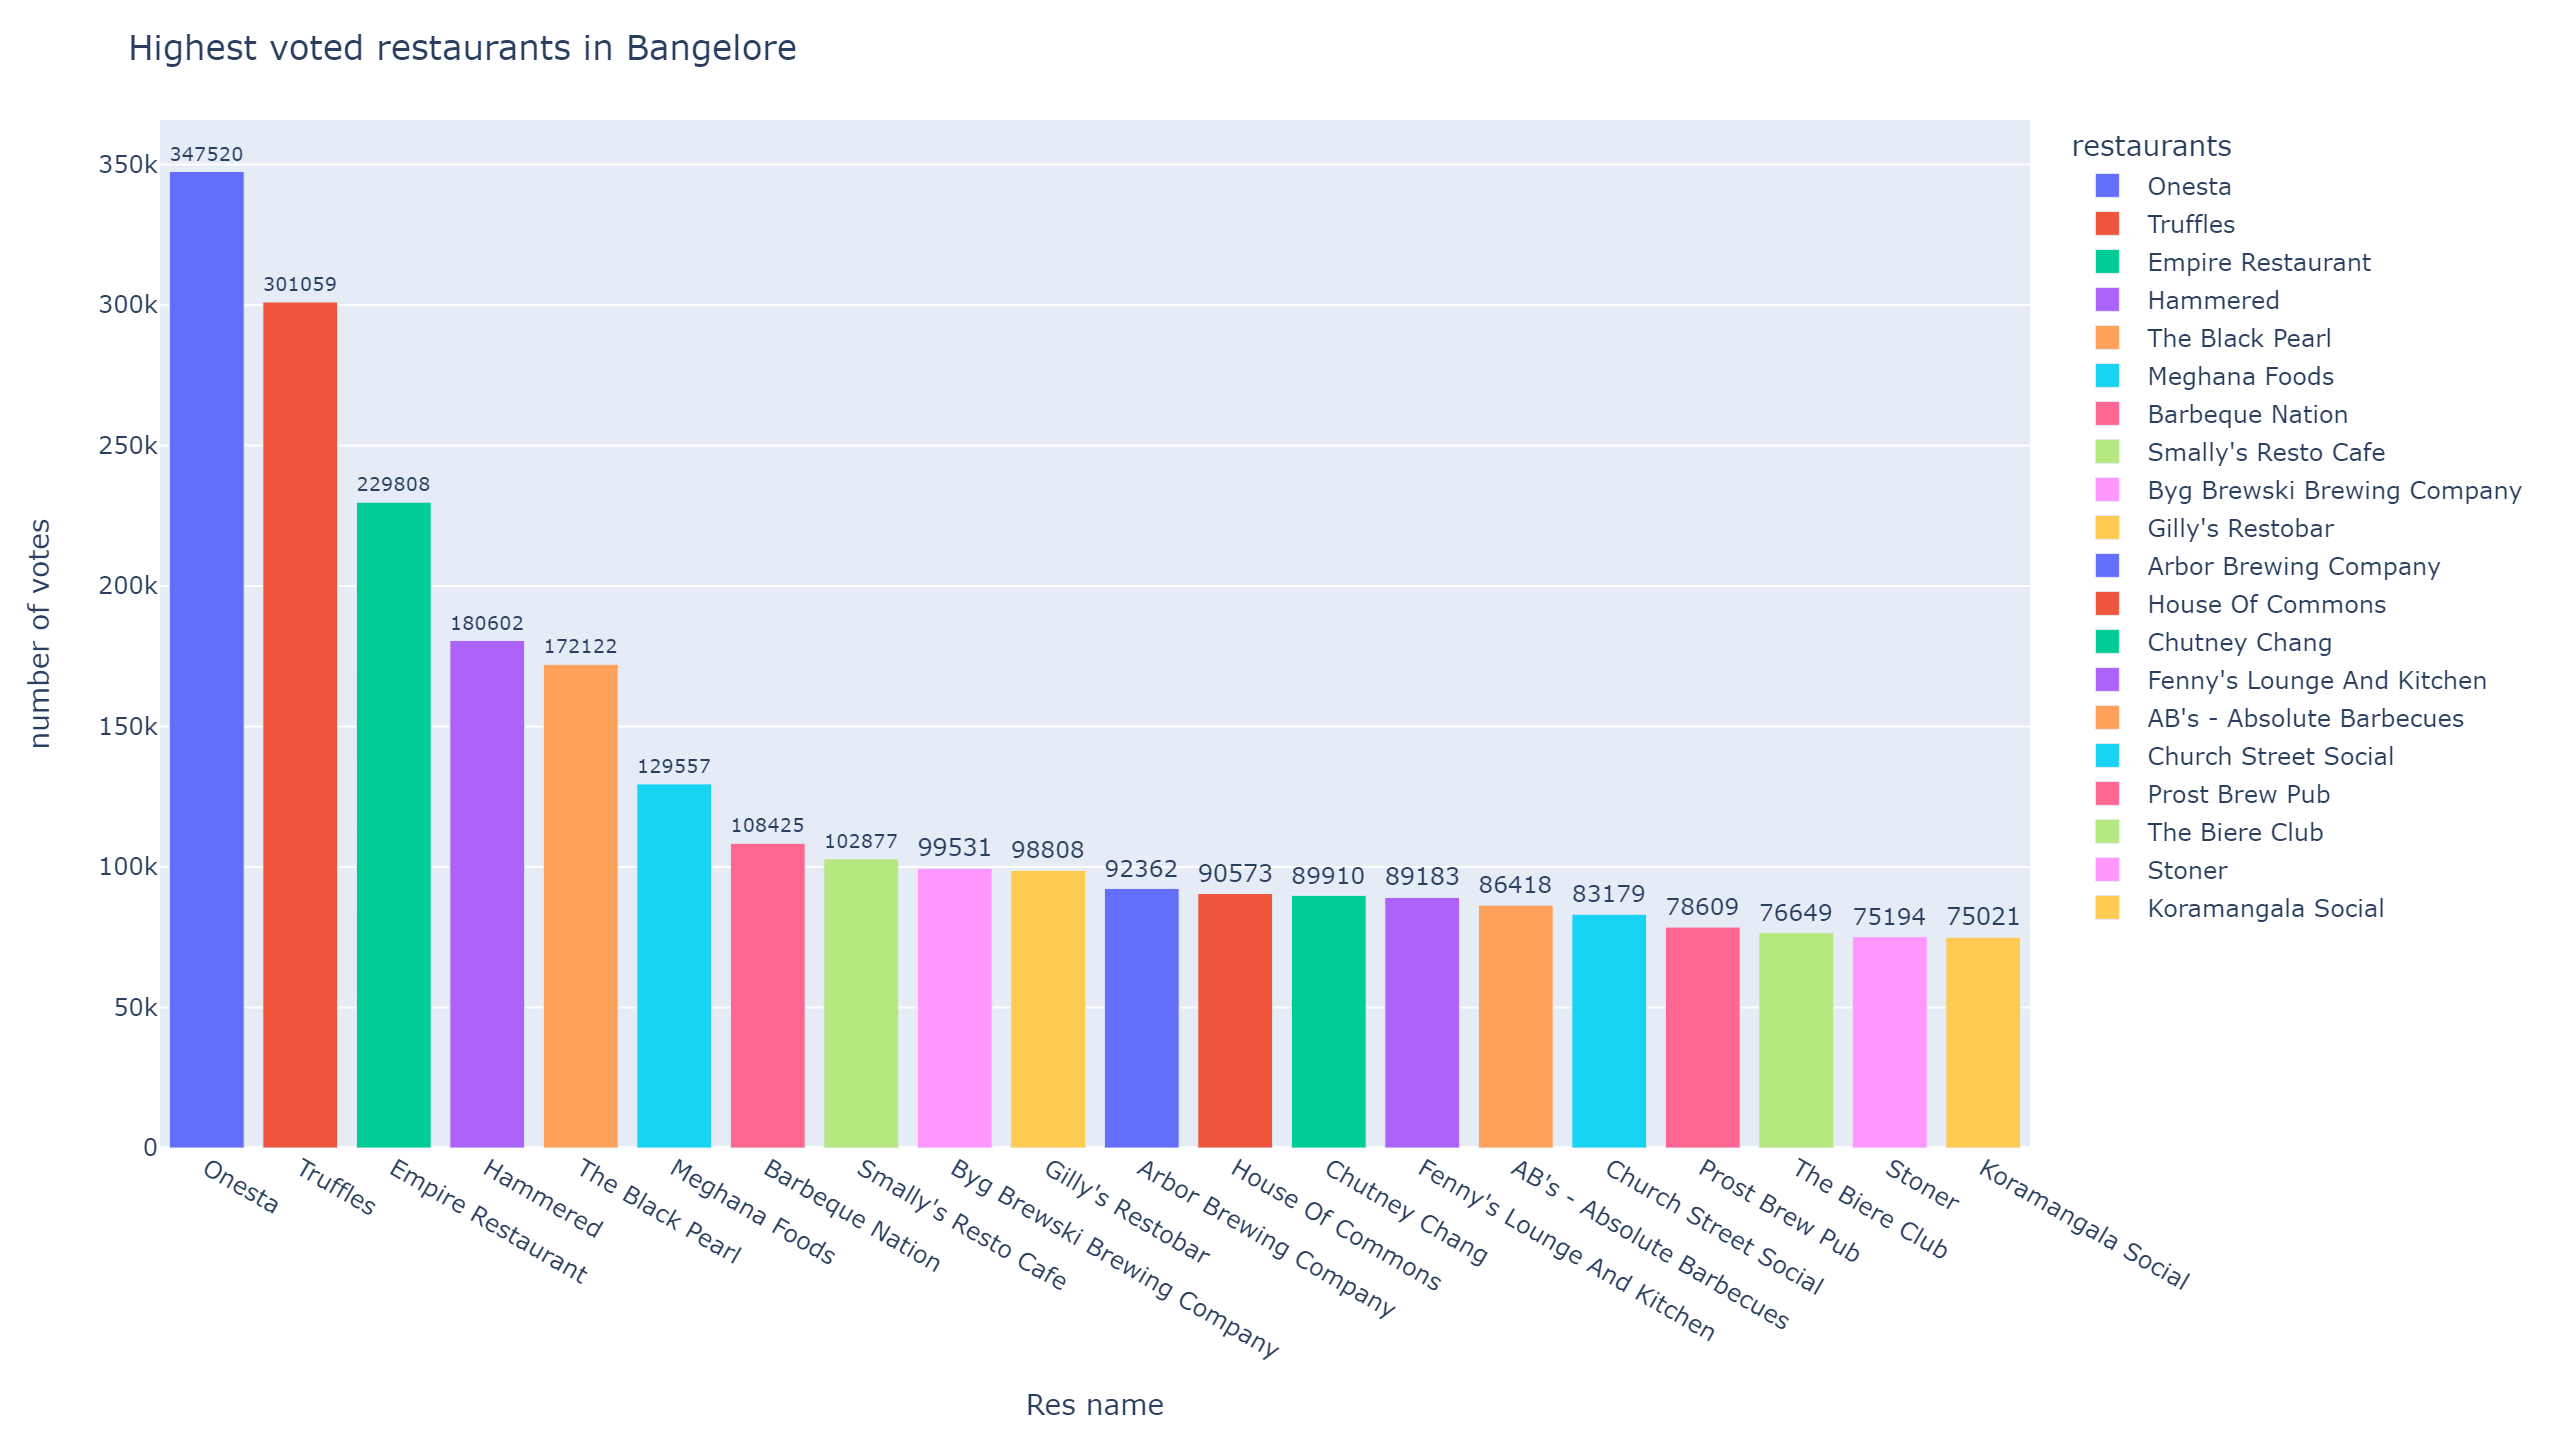

In [31]:
fig = px.bar(x = df.groupby('name')['votes'].sum().nlargest(20).index,
       y = df.groupby('name')['votes'].sum().nlargest(20), color = df.groupby('name')['votes'].sum().nlargest(20).index, text = df.groupby('name')['votes'].sum().nlargest(20))

fig.update_layout(xaxis_title = 'Res name', yaxis_title = 'number of votes')
fig.update_layout(title='Highest voted restaurants in Bangelore')
fig.update_layout(legend={"title" :'restaurants'})
fig.update_traces(textposition = 'outside')


# save as image
fig.write_image(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\highest voted restaurant in bangelore.jpeg",width = 1280, height = 720, engine = 'kaleido')
Image(fig.to_image(format='png',width=1280,height=720,engine='kaleido',scale=2))

# Q8) Total restaurant on different location of Bengalore

In [32]:
restaurant = []
location = []
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [33]:
df_location = pd.DataFrame(zip(location, restaurant))
df_location.columns = ['location','restaurant']
df_location.head()

location  restaurant
0                BTM         578
1       Banashankari         238
2          Banaswadi         150
3  Bannerghatta Road         361
4       Basavanagudi         195

In [34]:
df_location.set_index('location', inplace = True)
df_location.head()

restaurant
location                     
BTM                       578
Banashankari              238
Banaswadi                 150
Bannerghatta Road         361
Basavanagudi              195

<Figure size 1200x1200 with 0 Axes>

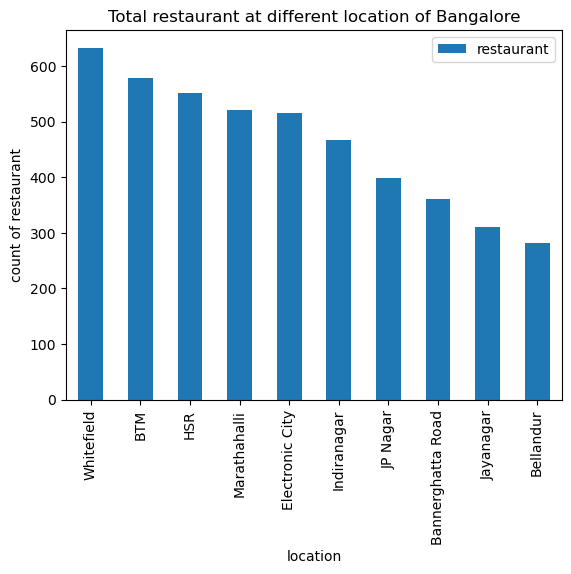

In [35]:
plt.figure(figsize = (6,6),dpi = 200)
df_location.sort_values(by = 'restaurant', ascending = False).head(10).plot.bar()
plt.xlabel('location')
plt.ylabel('count of restaurant')
plt.title('Total restaurant at different location of Bangalore')


#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\total rest at diff location.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

# ♦ Analysing price of Restaurant

## Q9) Total number of variety of restaurants in Bengalore ?

In [36]:
cuisines = df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2284
North Indian, Chinese                  2036
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 632
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

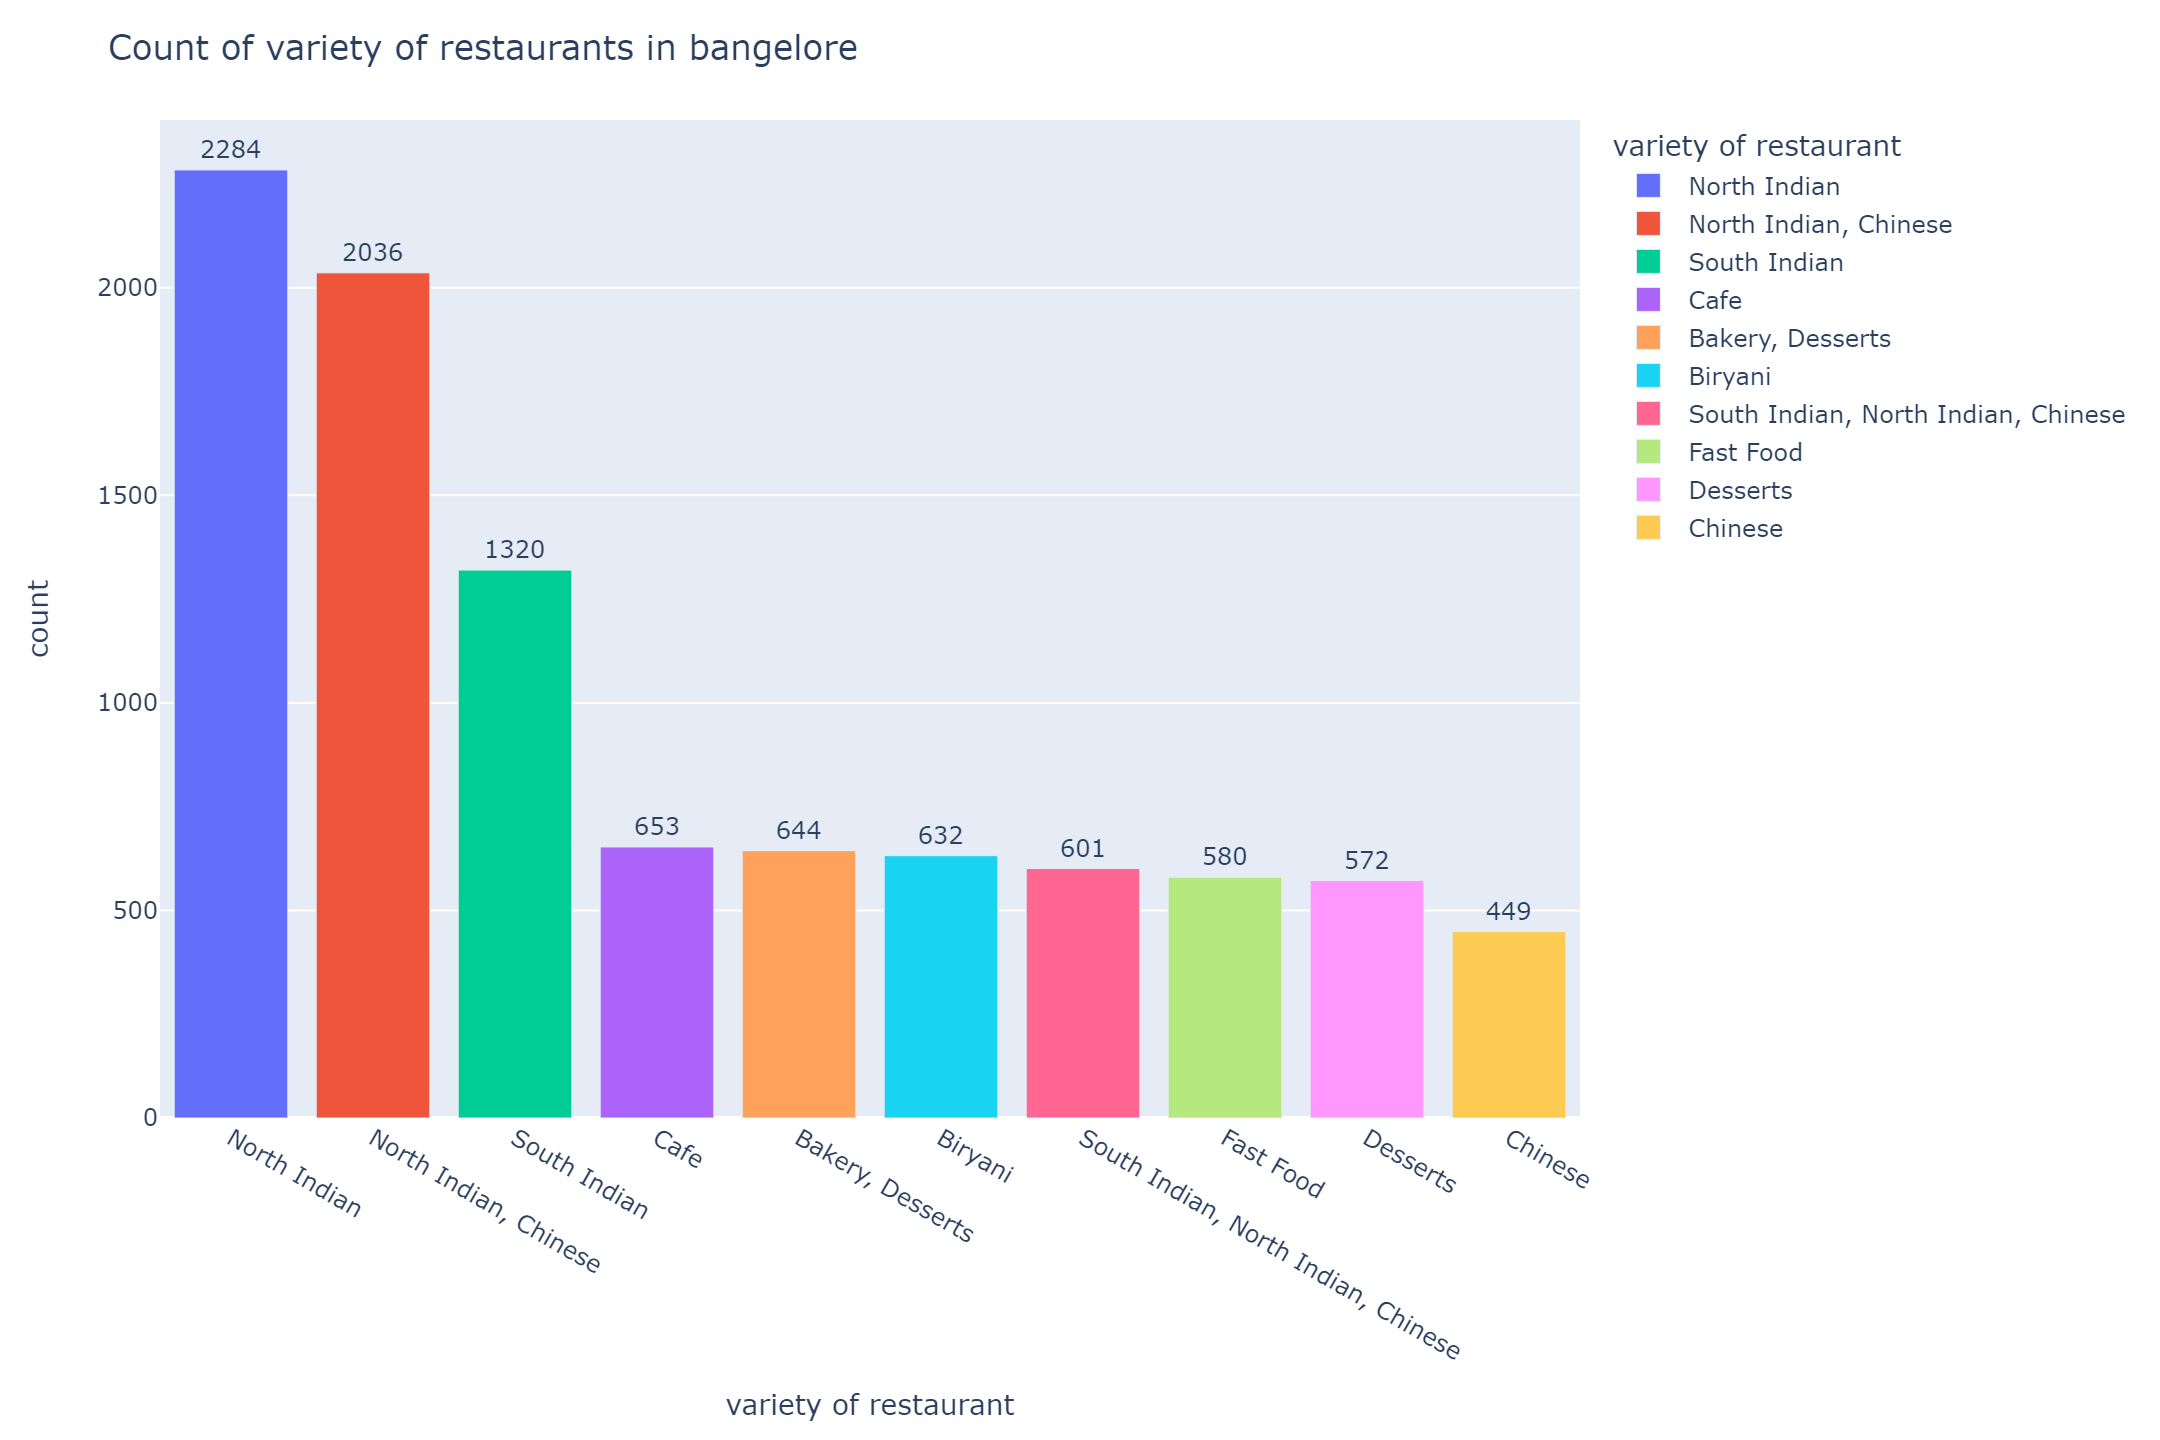

In [37]:
fig = px.bar(x=df['cuisines'].value_counts()[0:10].index,
      y = df['cuisines'].value_counts()[0:10], color = df['cuisines'].value_counts()[0:10].index,text = df['cuisines'].value_counts()[0:10])
fig.update_layout(xaxis_title = 'variety of restaurant', yaxis_title = 'count')
fig.update_layout(title='Count of variety of restaurants in bangelore')
fig.update_layout(legend={"title" :'variety of restaurant'})
fig.update_traces(textposition = 'outside')

# save as image
fig.write_image(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\variety of rest in bangelore.jpeg",width = 1280, height = 720, engine = 'kaleido')
Image(fig.to_image(format='png',width=1080,height=720,engine='kaleido',scale=2))

## • conclusion:
    Here we can see the North Indian restaurant is more than other restaurant in Bangelore

C:\Users\jawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

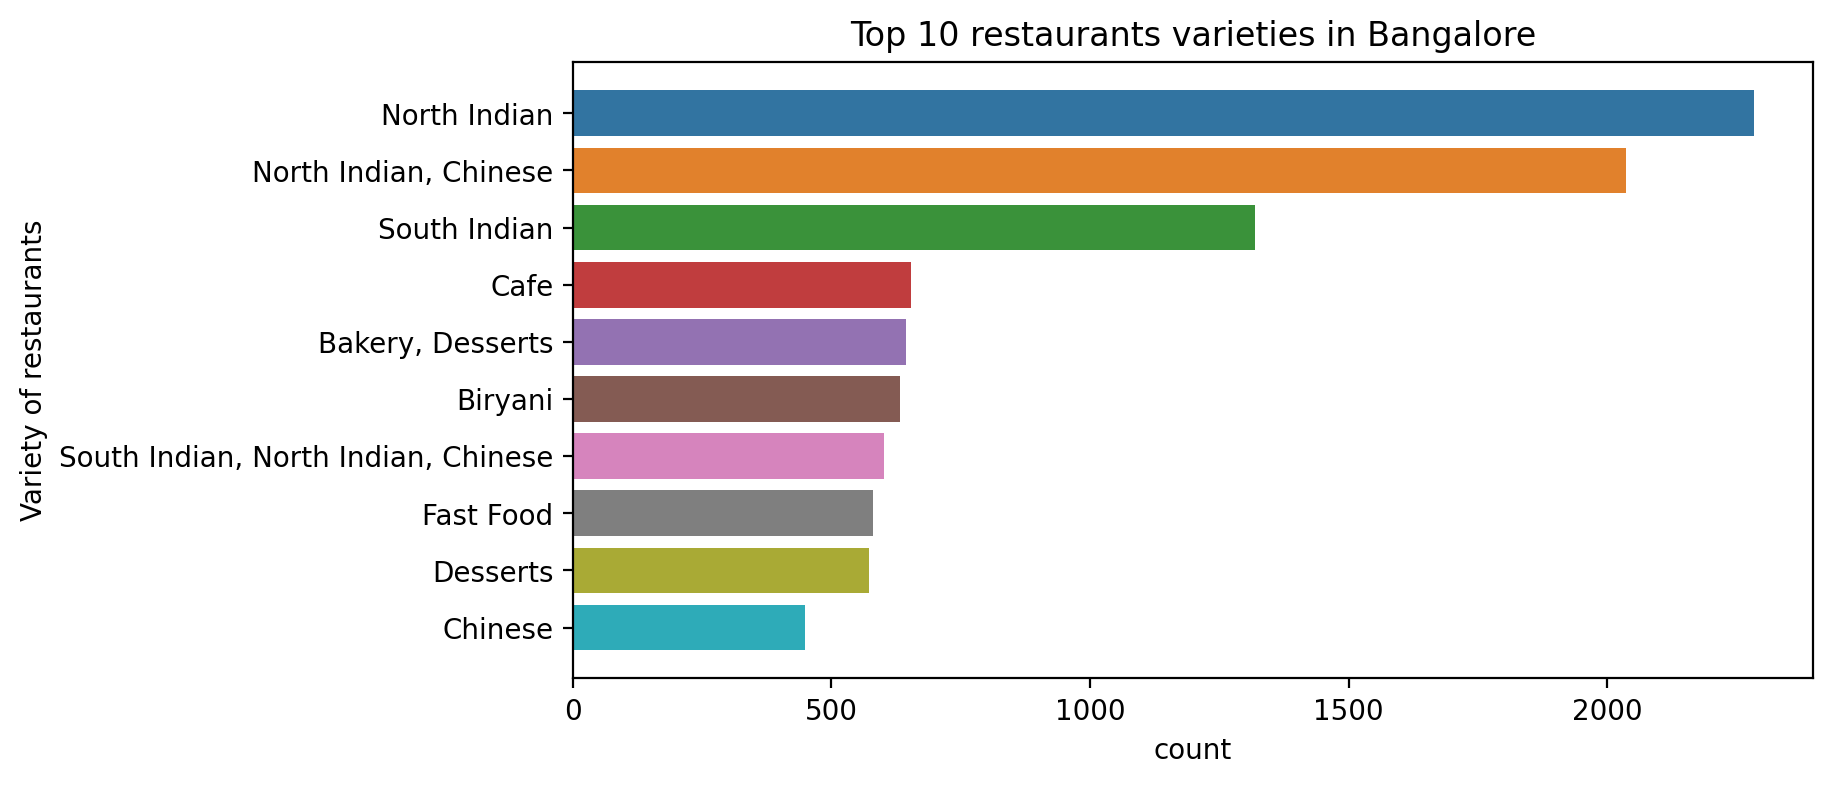

In [38]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(cuisines,cuisines.index)
plt.xlabel('count')
plt.ylabel('Variety of restaurants')
plt.title('Top 10 restaurants varieties in Bangalore')
plt.plot()


## Q10) Analysing Aprox cost of 2 people Feature

In [39]:
df.columns

Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
       'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [40]:
df['approx_cost(for two people)'].isnull().sum()

250

In [41]:
df.dropna(axis = 'index', subset = ['approx_cost(for two people)'], inplace = True)

In [42]:
df['approx_cost(for two people)'].isnull().sum()

0

In [43]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [44]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [45]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace("," , ""))

In [46]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [47]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [48]:
df['approx_cost(for two people)'].dtype

dtype('int32')

In [49]:
df['approx_cost(for two people)'].mean()

594.8098573758067

C:\Users\jawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



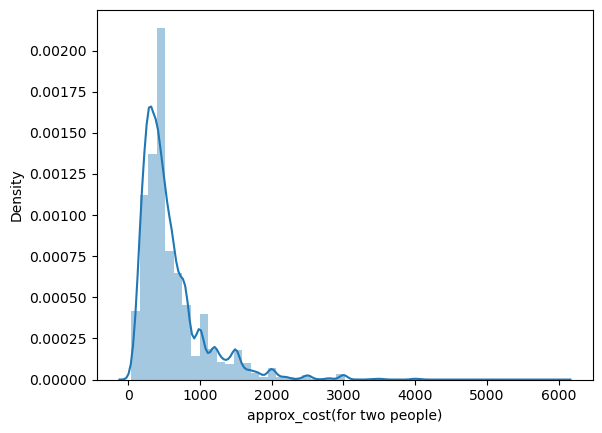

In [50]:
sns.distplot(df['approx_cost(for two people)'])

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\Approx cost for 2 people.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

C:\Users\jawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

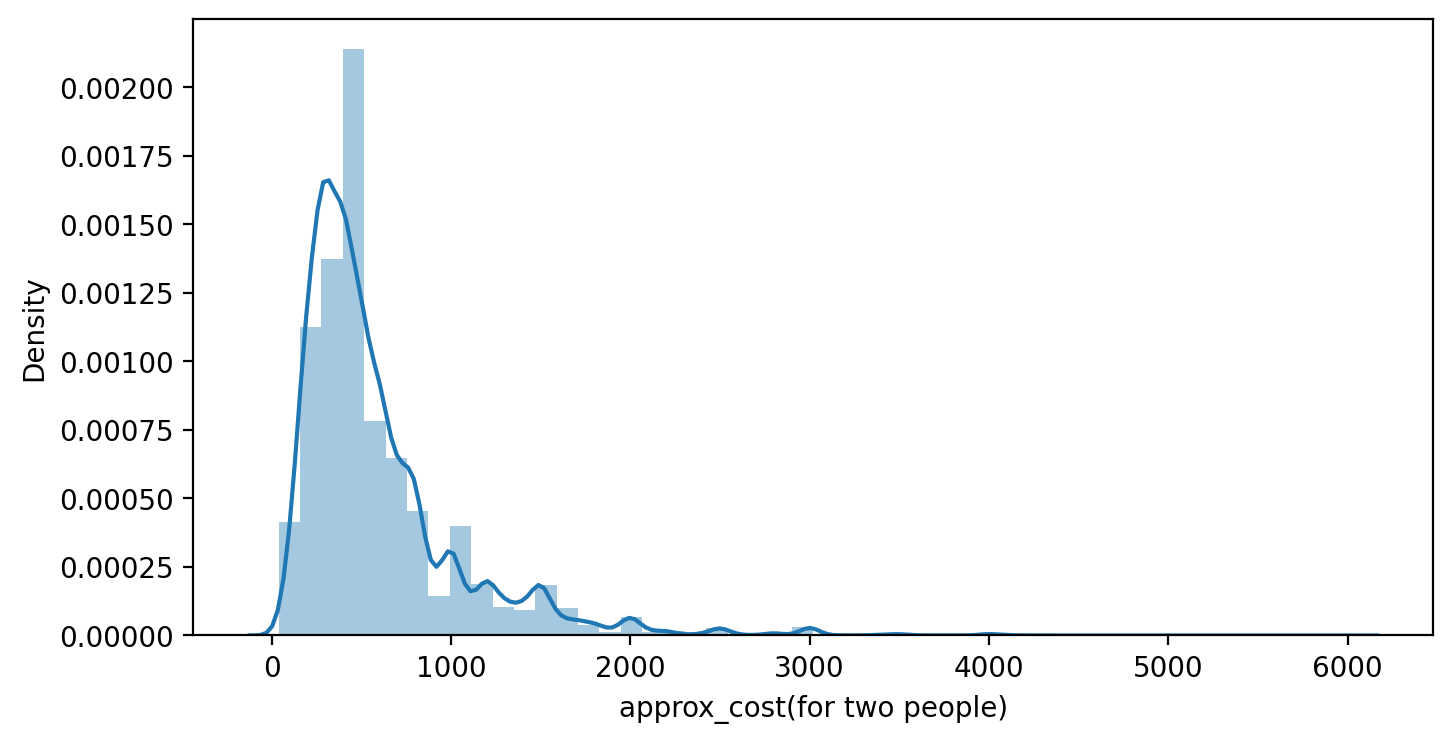

In [51]:
plt.figure(figsize = (8,4), dpi = 200)
sns.distplot(df['approx_cost(for two people)'])


## • conclusion:
    70% of restaurants offers food for two people under cost of approx 700 rupee

## Q11) Analyse Approx cost of two people with respect to rating.

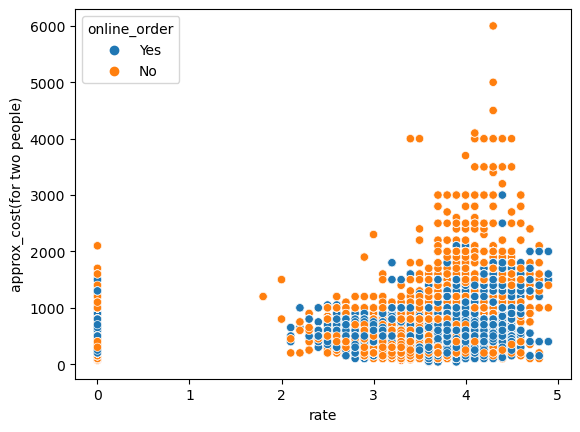

In [52]:
sns.scatterplot(x='rate',y='approx_cost(for two people)', data = df, hue = 'online_order')

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\scatter plot Approx cost of two people .jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

## • conclusion:
    There are affordale restaurant who's prise lies between 0 to 100
    and they have rating 3 to 4
    and also take online oreder
    
    Its clear that approx cost for two people is increasing with rating of restaurant but there
    are lots of high rated restaurants which are still in affordable range.

In [53]:
len(df['name'][(df['rate'] > 4.5) & (df['approx_cost(for two people)'] <= 2000)])

# There are 545 hotels which have rating more than 4.5 and have approx cost for two people
    # less than 2000 rupees.

545

## Q12) Is there any affect on votes of restaurants who accepts Online orders and not accept Online orders respectively

<AxesSubplot:xlabel='online_order', ylabel='votes'>

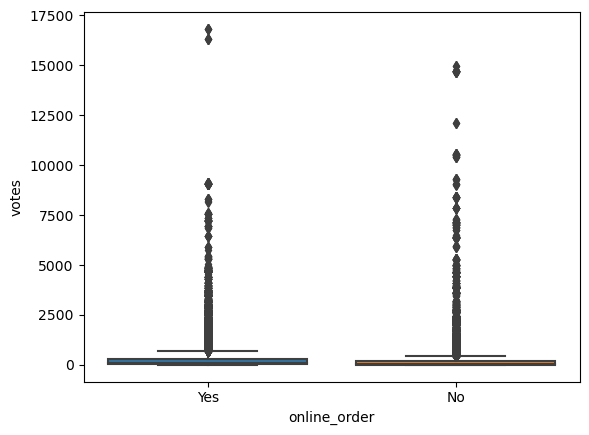

In [54]:
sns.boxplot(x = 'online_order', y = 'votes', data = df)



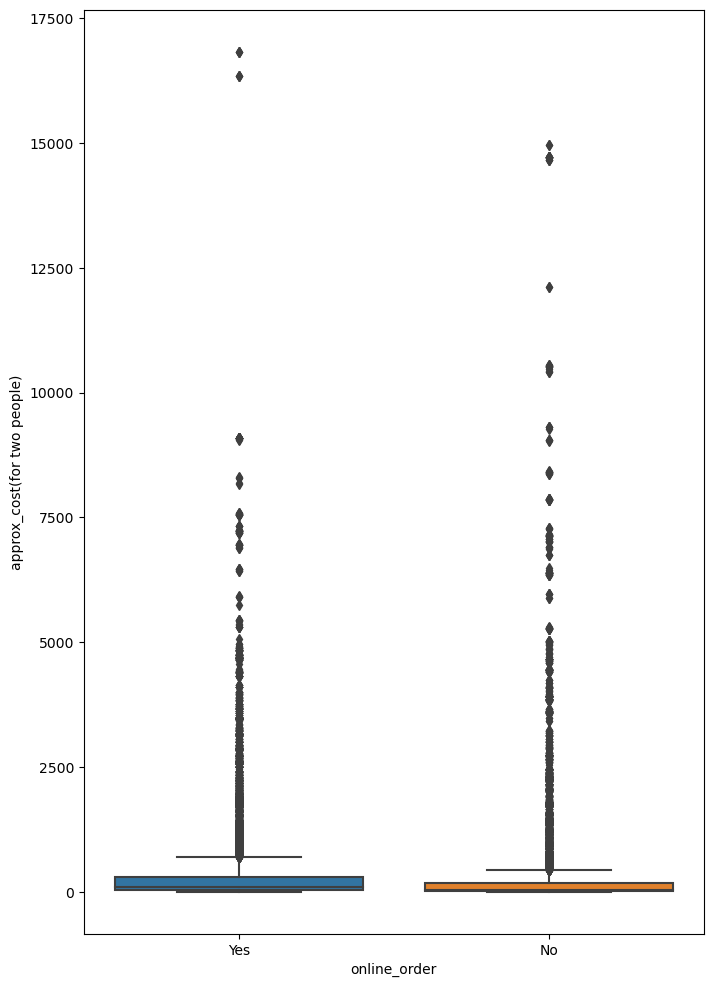

In [55]:
plt.figure(figsize=(8,12))
sns.boxplot(x='online_order',y='votes',data=df)
plt.ylabel('approx_cost(for two people)')
plt.plot()

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\affect on votes of restaurants who accepts Online orders.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

In [56]:
px.box(df,x = 'online_order', y = 'votes')


### • conclusion:
    we can say that the restaurants who are accepting online order has more votes as compare to 
    restaurant who do not accept online order 
    
    because zomato ask for rating from the customer after accepting order

## Q13) Is there any affect on price of restaurants who accepts Online orders and not accept Online orders respectively

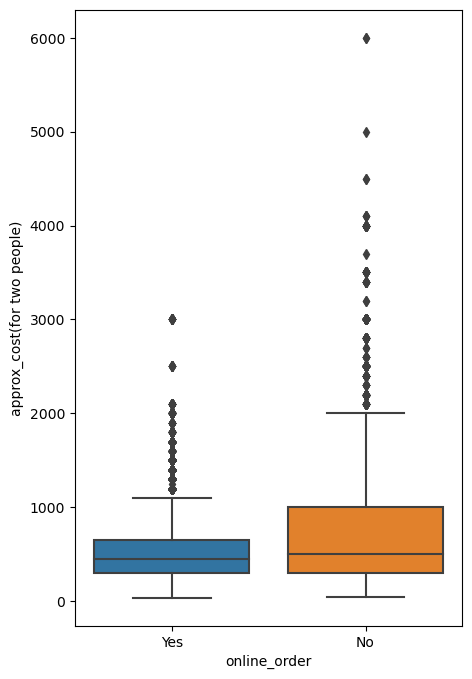

In [57]:
plt.figure(figsize=(5,8))
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)
plt.ylabel('approx_cost(for two people)')
plt.plot()

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\affect on price of restaurants who accepts Online orders.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

In [58]:
px.box(df,x = 'online_order', y = 'approx_cost(for two people)')

### • Conclusion:
    Restaurants who accept's online order are more affordable as compare to
    restaurants who does not accept online order.

# ♦ Analysing insights from Restaurant Pattern

## Q14) Find most luxurious Restaurant of Bangalore

In [59]:
df['approx_cost(for two people)'].min()

40

In [60]:
df['approx_cost(for two people)'].max()

6000

In [61]:
df[df['approx_cost(for two people)'] == 6000]['name']

# The restaurant with the highest amount is more luxurious Restaurant

16305    Le Cirque Signature - The Leela Palace
38843    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

## Q15) Top 10 Most Expensive restaurant with approx cost for 2 people

In [62]:
data = df.copy()

In [63]:
most_expensive = df[['name','approx_cost(for two people)']].sort_values(by = 'approx_cost(for two people)', ascending = False)[0:10]
most_expensive.head(10)

name  approx_cost(for two people)
38843  Le Cirque Signature - The Leela Palace                         6000
16305  Le Cirque Signature - The Leela Palace                         6000
34317              Royal Afghan - ITC Windsor                         5000
35427                  Malties - Radisson Blu                         4500
35869                  Malties - Radisson Blu                         4500
33308              La Brasserie - Le Meridien                         4100
33557              La Brasserie - Le Meridien                         4100
32100              La Brasserie - Le Meridien                         4100
34313              La Brasserie - Le Meridien                         4100
32965                Riwaz - The Ritz-Carlton                         4000

In [64]:
most_expensive.set_index('name' , inplace=True)

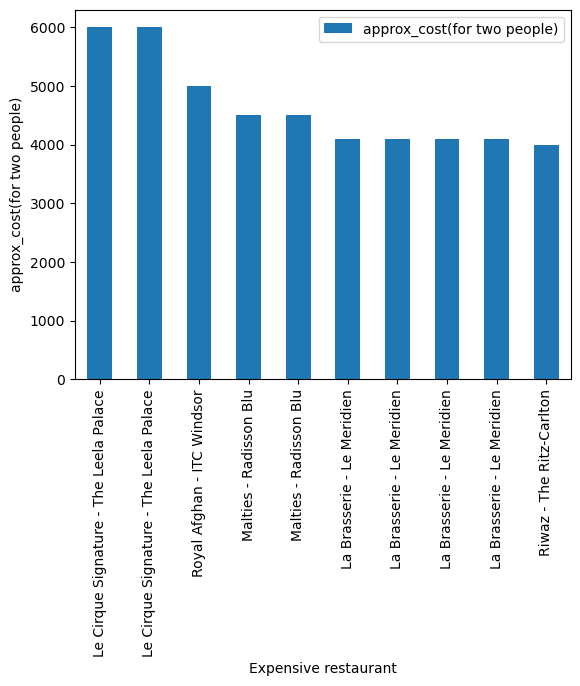

In [65]:
most_expensive.plot.bar()
plt.ylabel('approx_cost(for two people)')
plt.xlabel("Expensive restaurant")
plt.plot()

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\Top10 most expensive restaurants.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

## Q16) Top 10 Most Affordable Restaurant in Bangelore

In [66]:
cheap_res = df[['name','approx_cost(for two people)']].sort_values(by = 'approx_cost(for two people)', ascending = True)[0:10]
cheap_res.head(10)

name  approx_cost(for two people)
4571   Srinidhi Sagar Food Line                           40
25367     Srinidhi Sagar Deluxe                           40
10476  Srinidhi Sagar Food Line                           40
15101            Srinidhi Sagar                           40
12616  Srinidhi Sagar Food Line                           40
27641            Srinidhi Sagar                           40
23066     Srinidhi Sagar Deluxe                           40
16089  Srinidhi Sagar Food Line                           40
35998               Savera Cafe                           50
12426               Savera Cafe                           50

In [67]:
cheap_res.set_index('name',inplace = True)

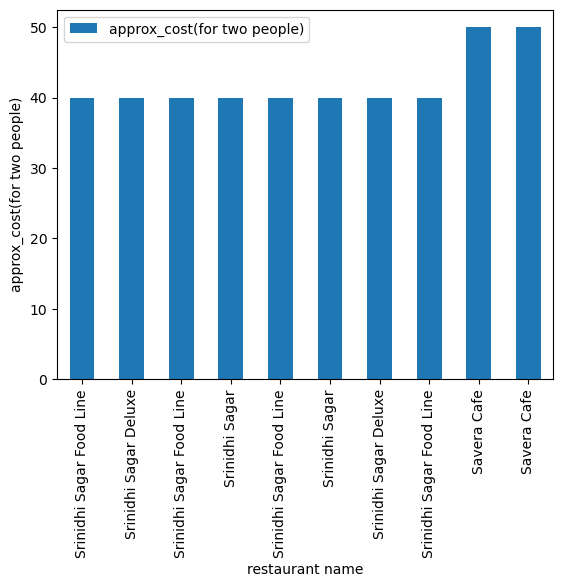

In [68]:
cheap_res.plot.bar()
plt.ylabel('approx_cost(for two people)')
plt.xlabel("restaurant name")
plt.plot()

#save fig
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\images\2 Analysing of Restaurant\Top10 most affordable restaurants.jpeg', format='jpeg',dpi = 300,bbox_inches='tight')

## Q17) Find the restaurant that are below than 500

In [69]:
df_budget = df[['name','approx_cost(for two people)']][df['approx_cost(for two people)']<=500]
df_budget.head(10)

name  \
3                               Addhuri Udupi Bhojana   
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
12                                   The Coffee Shack   
13                                         Caf-Eleven   
18                                           T3H Cafe   
19                      360 Atoms Restaurant And Cafe   
20                                   The Vintage Cafe   
21                                       Woodee Pizza   
24                                      Hide Out Cafe   
26                                       Coffee Tindi   

    approx_cost(for two people)  
3                           300  
10                          500  
12                          500  
13                          450  
18                          300  
19                          400  
20                          400  
21                          500  
24                          300  
26                          200

In [70]:
df_budget.set_index('name', inplace = True)

In [71]:
df_budget.reset_index(inplace=True)

In [72]:
df_budget.head(10)

name  \
0                              Addhuri Udupi Bhojana   
1  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                   The Coffee Shack   
3                                         Caf-Eleven   
4                                           T3H Cafe   
5                      360 Atoms Restaurant And Cafe   
6                                   The Vintage Cafe   
7                                       Woodee Pizza   
8                                      Hide Out Cafe   
9                                       Coffee Tindi   

   approx_cost(for two people)  
0                          300  
1                          500  
2                          500  
3                          450  
4                          300  
5                          400  
6                          400  
7                          500  
8                          300  
9                          200

In [73]:
# Save cleaned dataset
df.to_csv(r"D:\Full Stack Data Science\Data Analytics Project\P2_geopatial_Analytics\data_set\cleaned data for anaysis\cleaned_zomato.csv")